## Day1 Kisckstarter Project

## データの解説
- 参照データ https://www.kaggle.com/kemical/kickstarter-projects<br>
ks-projects-201801.csv<br>
**クラウドファンディングが成功するか(state)を予測するのが目的**


- ID:ID
- name:プロジェクト名, アルバムや本、映画など
- category:詳細なカテゴリ
- main_category：大まかなカテゴリ
- currency：使用された通貨
- deadline：締め切り日時
- goal：目標支援額
- launched：開始した日時
- pledged：支援額
- state：プロジェクトの状態(成功、失敗、キャンセル)
- backers：支援者数
- country：プロジェクトが開かれた国
- usd pledged：集まった資金(米ドル)
- usd_pledged_real:支援額(US)
- usd_goal_real:目標支援額(US)



In [1]:
#ライブラリインポート
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画
from datetime import datetime as dt
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix,precision_recall_fscore_support

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import os

pd.set_option('display.max_columns', 50)

In [2]:
#関数定義
def object2time(time):
    return dt.strptime(time, '%Y-%m-%d')

def object2timeHMS(time):
    return dt.strptime(time, '%Y-%m-%d %H:%M:%S')


In [3]:
#データの読み込み

origin_data = pd.read_csv("./ks-projects-201801.csv",sep = ",")
origin_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
origin_data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [5]:
#データの確認
print(origin_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


In [6]:
#欠損値の確認
print(origin_data.isnull().sum())

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


In [7]:
origin_data.country.value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [8]:
#ユニーク要素とユニーク件数
for column in origin_data.columns:
    print(column,origin_data[column].dtype)
    print(origin_data[column].unique())
print("unique件数")
print(origin_data.nunique())

ID int64
[1000002330 1000003930 1000004038 ...  999986353  999987933  999988282]
name object
['The Songs of Adelaide & Abullah'
 'Greeting From Earth: ZGAC Arts Capsule For ET' 'Where is Hank?' ...
 'Walls of Remedy- New lesbian Romantic Comedy feature unlike any other!!'
 'BioDefense Education Kit' 'Nou Renmen Ayiti!  We Love Haiti!']
category object
['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Tabletop Games' 'Design' 'Comic Books' 'Art Books'
 'Fashion' 'Childrenswear' 'Theater' 'Comics' 'DIY' 'Webseries'
 'Animation' 'Food Trucks' 'Public Art' 'Illustration' 'Photography' 'Pop'
 'People' 'Art' 'Family' 'Fiction' 'Accessories' 'Rock' 'Hardware'
 'Software' 'Weaving' 'Gadgets' 'Web' 'Jazz' 'Ready-to-wear' 'Festivals'
 'Video Games' 'Anthologies' 'Publishing' 'Shorts' 'Electronic Music'
 'Radio & Podcasts' 'Apps' 'Cookbooks' 'Apparel' 'Metal' 'Comedy'
 'Hip-Hop' 'Periodicals

In [7]:
origin_data["usd_pledged"] = origin_data["usd pledged"]
origin_data.drop("usd pledged",axis=1,inplace=True)
print(origin_data["usd_pledged"].value_counts().head())
print(origin_data["usd_pledged"].value_counts().head()/origin_data["usd_pledged"].size)

0.0     68112
1.0      5341
25.0     3877
10.0     3624
50.0     3141
Name: usd_pledged, dtype: int64
0.0     0.179876
1.0     0.014105
25.0    0.010239
10.0    0.009571
50.0    0.008295
Name: usd_pledged, dtype: float64


In [8]:
#usd_pledgeの欠損値は0に設定(averageで良いかも)
origin_data["usd_pledged"] = origin_data["usd_pledged"].fillna(0)
print(origin_data.isnull().sum())
#countryのN,0"はタイポ？→No countryの略？様子見
# origin_data.country = origin_data.country.replace('N,0"','NO')
# origin_data.country.unique()

ID                  0
name                4
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
usd_pledged         0
dtype: int64


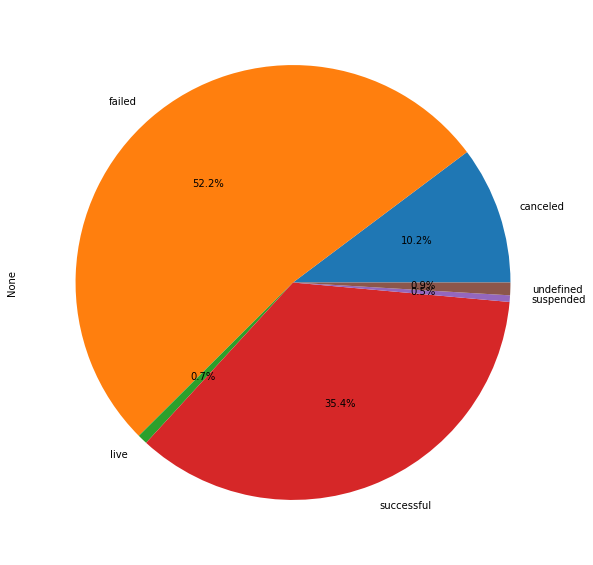

In [11]:
#stateの比率確認 failが50%越え
plt.figure(figsize= (10,10))
origin_data.groupby("state").size().plot(kind = "pie", autopct = "%1.1f%%")

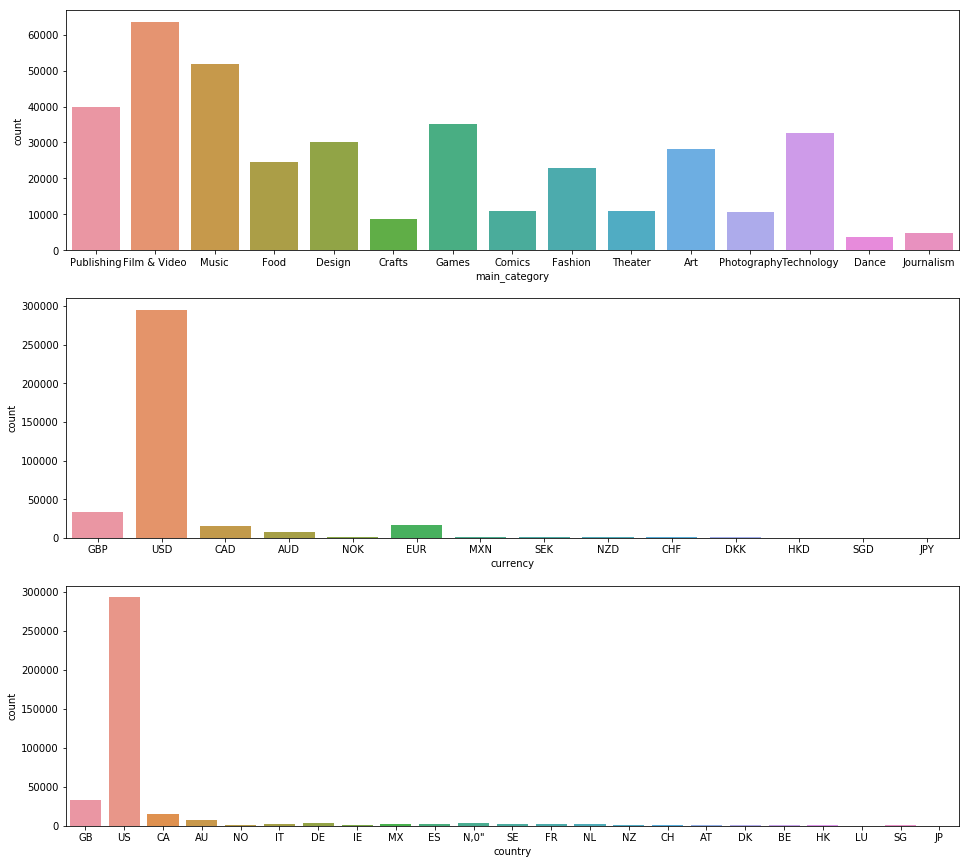

In [12]:
#データ分布確認
fig_n = 3
fig, ax = plt.subplots(fig_n,1,figsize=(16,fig_n*5))

sns.countplot(origin_data.main_category,ax=ax[0])
sns.countplot(origin_data.currency,ax=ax[1])
sns.countplot(origin_data.country,ax=ax[2])

plt.show()

# 方針/雑感
- state → 予測対象、まずはsuccessとその他に1/0で分ける
- ID → 不要と判断
- name → 不要と判断、欠損は無視
- category → ユニーク数が多いので保留
- main_category → ユニーク数がそこまで多くないのでワンホットエンコーディングかカテゴリごとにIDを振る
- currency  → ユニーク数がそこまで多くないのでワンホットエンコーディングかカテゴリごとにIDを振る
- deadline  → データ数の割にユニーク数が少ない、同じ値で比較するとで何か見えるかも
- goal → 同上
- launched → deadlineとの差分で期間が出るのでそちらを使う
- pledged → 現在の支援額、大きく影響すると思われる
- backers → データ数の割にユニーク数が少ない、Stateとの比較を実施
- country → データ数の割にユニーク数が少ない、同じ値で比較すると何か見えるかも、N,0"はNull?現状保留
- usd pledged → 欠損は0で埋める、Stateとの対比は実施
- usd_pledged_real → とりあえず予測に入れてみる
- usd_goal_real → とりあえず予測に入れてみる

In [12]:
#データコピー
df = origin_data.copy()

#stateの0/1変換
df.loc[df["state"] == "successful", "state"] = 1
df.loc[df["state"] != 1, "state"] = 0

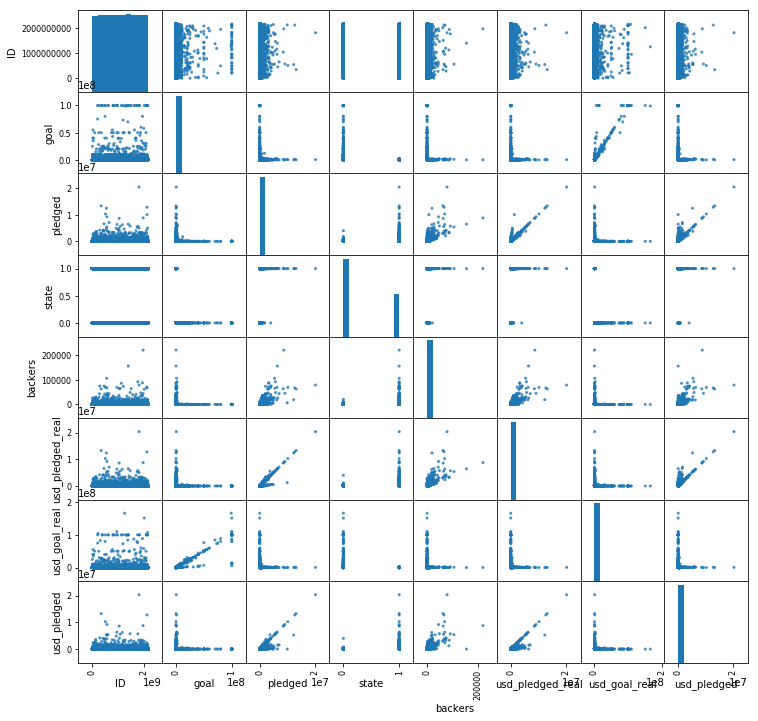

In [17]:
# 散布図
pd.plotting.scatter_matrix(df,alpha = 0.8, figsize=(12,12),range_padding = 0.5)
plt.show()

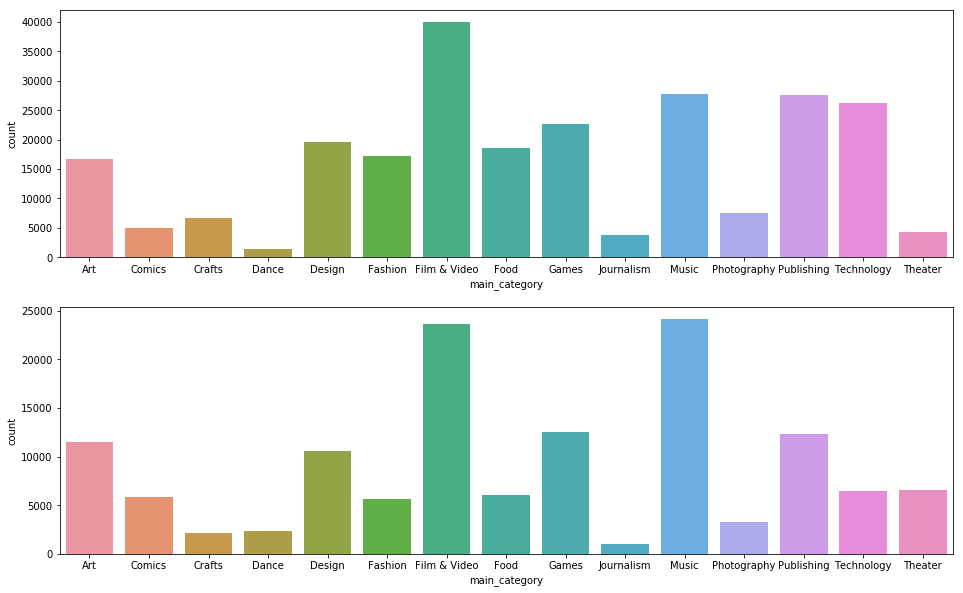

In [13]:
main_category = df["main_category"].value_counts()
main_category_failed = df[df["state"] == 0]["main_category"]
main_category_success = df[df["state"] == 1]["main_category"]
main_category_failed_counts = df[df["state"] == 0]["main_category"].value_counts()
main_category_success_counts = df[df["state"] == 1]["main_category"].value_counts()
fig_n = 2
fig, ax = plt.subplots(fig_n,1,figsize=(16,fig_n*5))
main_category_failed = main_category_failed.sort_values()
main_category_success = main_category_success.sort_values()
main_category_success_ratio = main_category_success_counts/(main_category_failed_counts+main_category_failed_counts)
sns.countplot(main_category_failed,ax=ax[0])
sns.countplot(main_category_success,ax=ax[1])


In [16]:
#レシオもグラフにしたかったが断念、次回何かを参考に作る
main_category_success_ratio

Art             0.345791
Comics          0.586900
Crafts          0.157977
Dance           0.817483
Design          0.270236
Fashion         0.162370
Film & Video    0.295568
Food            0.164308
Games           0.275569
Journalism      0.135186
Music           0.436438
Photography     0.221100
Publishing      0.223036
Technology      0.123092
Theater         0.746061
Name: main_category, dtype: float64

In [9]:
#データクレンジング
df = origin_data.copy()

#stateの0/1変換
df.loc[df["state"] == "successful", "state"] = 1
df.loc[df["state"] != 1, "state"] = 0

#不要なcolumnの削除
df.drop("ID", axis=1, inplace=True)
df.drop("name", axis=1, inplace=True)
df.drop("category", axis=1, inplace=True)

#日付の型変更,priod(期間)の追加
df["deadline"] = df["deadline"].apply(object2time)
df["launched"] = df["launched"].apply(object2timeHMS)
df["period"] =  df["deadline"] - df["launched"]
df["period"] = df["period"].dt.days

df.drop("deadline", axis=1, inplace=True)
df.drop("launched", axis=1, inplace=True)


#ユニーク数が少ない項目をワンホットエンコーディング
df = pd.get_dummies(df,columns=["main_category"])
df = pd.get_dummies(df,columns=["currency"])
df = pd.get_dummies(df,columns=["country"])

df.head()


,goal,pledged,state,backers,usd_pledged_real,usd_goal_real,usd_pledged,period,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,currency_AUD,currency_CAD,...,currency_SGD,currency_USD,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000.0,0.0,0,0,0.0,1533.95,0.0,58,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30000.0,2421.0,0,15,2421.0,30000.00,100.0,59,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,45000.0,220.0,0,3,220.0,45000.00,220.0,44,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,5000.0,1.0,0,1,1.0,5000.00,1.0,29,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,19500.0,1283.0,0,14,1283.0,19500.00,1283.0,55,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
df.describe()

,goal,pledged,state,backers,usd_pledged_real,usd_goal_real,usd_pledged,period,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,currency_AUD,currency_CAD,...,currency_SGD,currency_USD,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
count,3.786610e+05,3.786610e+05,378661.000000,378661.000000,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.00000,378661.000000,378661.000000,...,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.00000,378661.000000,378661.00000,378661.000000,378661.000000
mean,4.908079e+04,9.682979e+03,0.353762,105.617476,9.058924e+03,4.545440e+04,6.966168e+03,33.481122,0.074349,0.028572,0.023264,0.009951,0.079411,0.060254,0.167921,0.064971,0.093041,0.012557,0.137109,0.028466,0.105303,0.086011,0.02882,0.020995,0.039513,...,0.001466,0.780025,0.001577,0.020702,0.001629,0.038969,0.002010,0.011015,0.002939,0.006011,0.007762,0.088924,0.001632,0.002142,0.007600,0.000106,0.000164,0.004627,0.010027,0.007574,0.00187,0.003821,0.00464,0.001466,0.772794
std,1.183391e+06,9.563601e+04,0.478137,907.185035,9.097334e+04,1.152950e+06,7.824761e+04,65.909172,0.262338,0.166600,0.150740,0.099257,0.270380,0.237958,0.373796,0.246475,0.290490,0.111354,0.343963,0.166300,0.306943,0.280381,0.16730,0.143368,0.194812,...,0.038256,0.414230,0.039675,0.142385,0.040333,0.193521,0.044785,0.104373,0.054136,0.077295,0.087757,0.284634,0.040366,0.046230,0.086849,0.010277,0.012795,0.067863,0.099634,0.086699,0.04320,0.061699,0.06796,0.038256,0.419027
min,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,2.000000e+03,3.000000e+01,0.000000,2.000000,3.100000e+01,2.000000e+03,1.345000e+01,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000
50%,5.200000e+03,6.200000e+02,0.000000,12.000000,6.243300e+02,5.500000e+03,3.750000e+02,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000
75%,1.600000e+04,4.076000e+03,1.000000,56.000000,4.050000e+03,1.550000e+04,3.000000e+03,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [22]:
# 相関係数
df.corr()

,goal,pledged,state,backers,usd_pledged_real,usd_goal_real,usd_pledged,period,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,currency_AUD,currency_CAD,...,currency_SGD,currency_USD,country_AT,country_AU,country_BE,country_CA,country_CH,country_DE,country_DK,country_ES,country_FR,country_GB,country_HK,country_IE,country_IT,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
goal,1.000000,0.007358,-0.024332,0.004012,0.005104,0.942692,0.005567,0.004321,-0.001976,-0.004179,-0.004889,-0.003284,-0.000583,-0.005192,0.013383,-0.000086,0.000441,0.003783,-0.011124,-0.005218,-0.005783,0.018310,-0.003135,0.002767,0.000828,...,-0.000896,-0.008598,-0.000311,0.002863,-0.000534,0.000938,0.008107,0.001717,0.008729,-0.000127,0.001788,-0.005526,0.004676,-0.000258,0.001557,0.015872,-0.000201,0.013334,-0.003714,0.003295,0.018475,-0.000803,0.016824,-0.000896,-0.007864
pledged,0.007358,1.000000,0.111534,0.717079,0.952843,0.005024,0.856429,0.000847,-0.018006,-0.004992,-0.012372,-0.006282,0.053549,-0.008298,-0.015596,-0.011970,0.040799,-0.007623,-0.023717,-0.010772,-0.021682,0.041389,-0.010061,-0.003350,-0.004412,...,0.001967,-0.001393,0.001892,-0.003211,-0.001524,-0.004213,0.003383,-0.001272,0.020165,-0.003744,0.000729,-0.015965,0.049393,-0.002463,-0.004182,0.034112,-0.000414,0.012054,-0.007008,-0.000544,0.009770,-0.001441,0.039414,0.001967,-0.000247
state,-0.024332,0.111534,1.000000,0.129109,0.110704,-0.023052,0.098114,-0.026096,0.032645,0.066792,-0.036689,0.055926,-0.001790,-0.057528,0.016683,-0.058673,0.001038,-0.033240,0.093623,-0.016879,-0.032497,-0.100224,0.088260,-0.030875,-0.032775,...,-0.002648,0.065202,-0.014505,-0.029603,-0.009075,-0.030999,-0.010139,-0.028499,-0.003442,-0.022378,-0.008289,0.003010,-0.000359,-0.009546,-0.036831,-0.003843,-0.001266,-0.018214,-0.068643,-0.025329,-0.011310,-0.005720,-0.009148,-0.002648,0.076169
backers,0.004012,0.717079,0.129109,1.000000,0.752539,0.004517,0.697455,-0.000792,-0.019810,0.005511,-0.013326,-0.006942,0.043927,-0.012329,-0.019611,-0.014948,0.076320,-0.008369,-0.023486,-0.012435,-0.018777,0.019900,-0.011120,-0.003997,-0.004149,...,0.000863,0.013312,0.000160,-0.003785,-0.002285,-0.003850,-0.000859,-0.000847,-0.002177,-0.002868,0.001320,-0.007126,0.001391,-0.002436,-0.004982,-0.000647,-0.000795,-0.006100,-0.011717,-0.002507,-0.003273,-0.002380,-0.000695,0.000863,0.015168
usd_pledged_real,0.005104,0.952843,0.110704,0.752539,1.000000,0.005596,0.906639,0.000946,-0.018187,-0.004616,-0.012598,-0.006178,0.049583,-0.009315,-0.014325,-0.011432,0.042189,-0.007987,-0.022787,-0.010324,-0.021529,0.040776,-0.009568,-0.005082,-0.006471,...,0.000622,0.011454,0.003115,-0.004949,-0.001013,-0.006282,0.003994,0.000554,-0.001340,-0.002881,0.002558,-0.006981,0.003187,-0.001984,-0.003237,-0.000696,-0.000211,-0.005750,-0.006758,0.001093,-0.002517,-0.002487,-0.001068,0.000622,0.012392
usd_goal_real,0.942692,0.005024,-0.023052,0.004517,0.005596,1.000000,0.006204,0.004184,-0.001538,-0.003850,-0.004688,-0.003119,-0.000913,-0.005061,0.014483,0.000820,-0.000147,0.003966,-0.010401,-0.004927,-0.006146,0.015122,-0.002744,0.001511,-0.000282,...,-0.000996,-0.002902,-0.000028,0.001596,-0.000285,-0.000183,0.008790,0.002724,-0.000465,0.000481,0.002730,-0.000726,-0.000757,0.000078,0.002532,-0.000257,-0.000130,-0.001809,-0.003523,0.004853,0.000825,-0.001068,-0.000264,-0.000996,-0.002271
usd_pledged,0.005567,0.856429,0.098114,0.697455,0.906639,0.006204,1.000000,0.000793,-0.016053,-0.003555,-0.011414,-0.005130,0.037780,-0.008696,-0.008674,-0.009287,0.038222,-0.006932,-0.019173,-0.009116,-0.019139,0.033276,-0.007512,-0.005738,-0.005923,...,-0.002128,0.015415,-0.000783,-0.005595,-0.001685,-0.005712,-0.

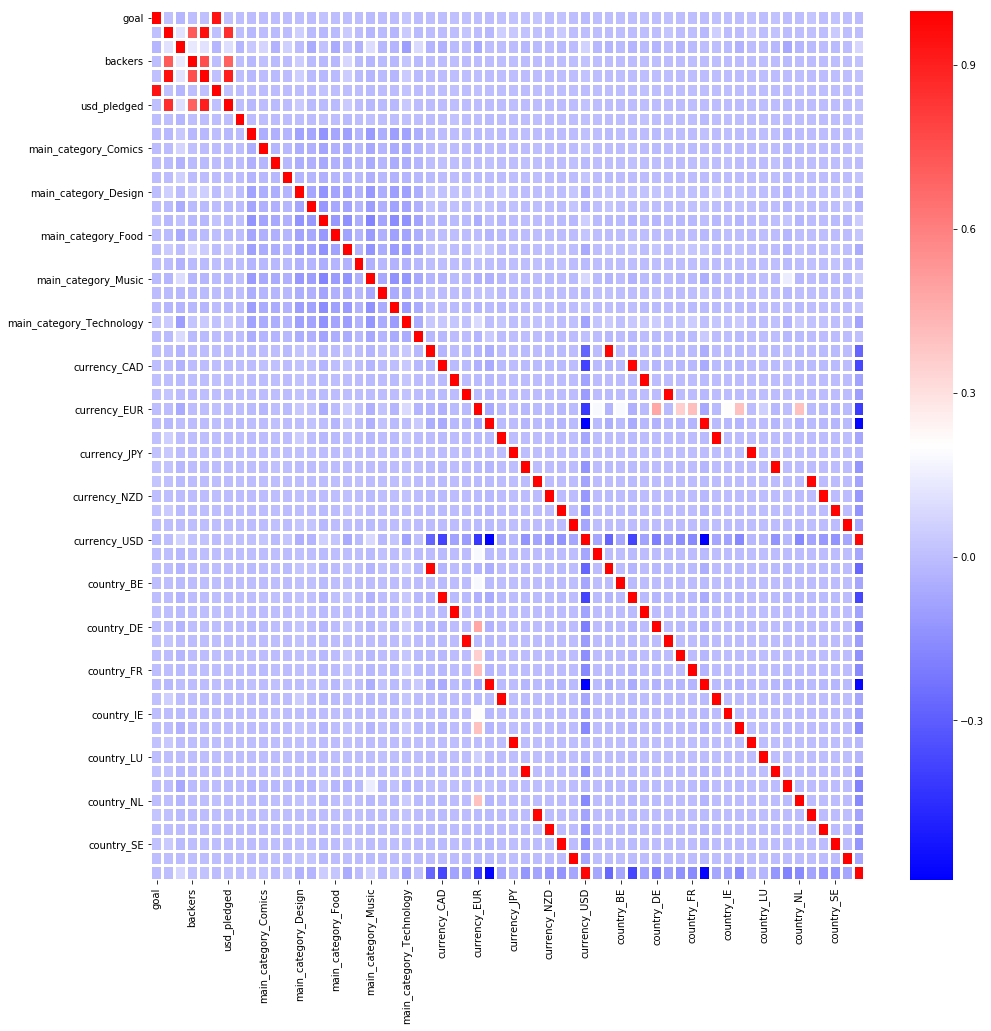

In [23]:
#ヒートマップ パラメータ減らさないとあまり意味がなさそう
# sns.heatmap(df.corr(),annot=True,cmap='bwr',linewidths=0.2) 
sns.heatmap(df.corr(),cmap='bwr',linewidths=2) 
fig=plt.gcf()
fig.set_size_inches(16,16)
plt.show()

In [13]:
#SGDClassifierで予測

y = df["state"].values
X = df.drop('state', axis=1).values
# clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=12, tol=1e-3)
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=10, tol=1e-3)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
print(w0,clf.coef_)


141.77338969401296 [[-1.66468235e+03  1.85647905e+03  6.25258692e+03  6.72885503e+02
  -1.08313863e+03  9.95419871e+02 -1.77352776e+02  2.22793984e+01
   2.34717909e+01 -8.20952709e+00  2.68987558e+01 -4.67243210e+01
  -1.58659438e+01  1.29413698e+02  3.02941429e-01 -7.55159958e+01
   3.73118398e+00 -1.28470502e+01 -3.09328249e+00  7.99867583e+01
  -4.84400476e+01  6.63850311e+01 -2.13782014e+01 -9.84522580e+00
   8.37171397e-01  1.16423984e+00 -6.98220179e-01 -1.92582314e+01
  -1.28033668e+00 -7.71588680e-01  3.38043701e+00  1.39725333e+00
   3.59084045e+00  9.53337157e-01 -5.41772116e+00  1.89099636e+02
   5.29674004e+00 -1.54166085e+01  1.18723939e+00  8.31062992e-01
   1.24018446e+00 -6.51550547e-01  2.03029203e+00  1.12689135e+00
  -1.92576539e+00  1.87331377e+01 -1.28033668e+00  3.91405903e+00
  -2.74633640e+00 -7.71588680e-01  1.54955873e-01  3.38043701e+00
  -3.00601197e+02 -4.58557972e+00  2.13950188e+00  6.04408111e+00
   2.31428381e+00 -5.41772116e+00  4.26777208e+02]]


In [14]:
#尤度、正答率、クロス集計表
y_est = clf.predict(X)
print("対数尤度=\t{}".format(log_loss(y,y_est)))
print("正答率=\t\t{:.3f}".format(accuracy_score(y,y_est)*100))


precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_est)
print("Precision =\t{:.6}%".format(precision[0]*100))
print("Recall =\t{:.6}%".format(recall[0]*100))
print("F1値 =\t\t{:.6}%".format(f1_score[0]*100))

conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = failed(success以外)', '正解 = success'], 
                        columns=['予測 = failed(success以外)', '予測 = success'])
conf_mat



対数尤度=	0.5975432768307993
正答率=		98.270
Precision =	98.7569%
Recall =	98.5636%
F1値 =		98.6601%


,予測 = failed(success以外),予測 = success
正解 = failed(success以外),241190,3515
正解 = success,3036,130920


In [ ]:
#random_stateに対する検討 n=1以外だと計算が終わらない
y = df["state"].values
X = df.drop('state', axis=1).values
n = 3
loglikelihood_list = [0]*n
correct_answer_rate_list = [0]*n
precision_list = [0]*n
recall_list = [0]*n
f1_list = [0]*n

for i in range(n):
    clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=i, tol=1e-3)
    clf.fit(X, y)
    y_est = clf.predict(X)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_est)
    correct_answer_rate_list[i] = accuracy_score(y,y_est)*100
    loglikelihood_list[i] = log_loss(y,y_est)
    precision_list[i] = precision[0]*100
    recall_list[i] = recall[0]*100
    f1_list[i] = f1_score[0]*100

print(correct_answer_rate_list,loglikelihood_list,precision_list,recall_list,f1_list)

In [17]:
#SGDClassifierで予測

y = df["state"].values
X = df.drop('state', axis=1).values
# clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=12, tol=1e-3)
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

#尤度、正答率、クロス集計表
y_est = clf.predict(X)
print("対数尤度=\t{}".format(log_loss(y,y_est)))
print("正答率=\t\t{:.3f}".format(accuracy_score(y,y_est)*100))


precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_est)
print("Precision =\t{:.6}%".format(precision[0]*100))
print("Recall =\t{:.6}%".format(recall[0]*100))
print("F1値 =\t\t{:.6}%".format(f1_score[0]*100))

conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = failed(success以外)', '正解 = success'], 
                        columns=['予測 = failed(success以外)', '予測 = success'])
conf_mat



対数尤度=	0.417764853643032
正答率=		98.790
Precision =	99.9996%
Recall =	98.1288%
F1値 =		99.0553%


,予測 = failed(success以外),予測 = success
正解 = failed(success以外),240126,4579
正解 = success,1,133955
